## Starting / Web Scraping / Storing Data
In this section, we're import modules and connect the site. Then, we scraping the web and save the data for using in the dataset.

In [134]:
# github.com/echtr 
import requests
from bs4 import BeautifulSoup
import pandas as pd

URL = "https://www.imdb.com/search/title/?groups=top_100&sort=user_rating,desc"
URL2 = "https://www.imdb.com/search/title/?groups=top_100&sort=user_rating,desc&start=51&ref_=adv_nxt"
popularities = []
names = []
years = []
stars = []
durations = []
genres = []

def connection(url_text):
    connect = requests.get(url_text)
    soup = BeautifulSoup(connect.text, "html.parser")
    node1 = soup.find_all("div", {"class": "lister-item-content"})
    for node in node1:
        for header in node.findChildren("h3",{"class": "lister-item-header"}):
            popularities.append(header.findChildren("span")[0].text[:-1])
            names.append(header.findChildren("a")[0].text)
            years.append(header.findChildren("span")[1].text[1:-1])
        for rt_bar in node.findChildren("div", {"class":"ratings-bar"}):
            stars.append(rt_bar.findChildren("strong")[0].text)
        for text_muted in node.findChildren("p", {"class":"text-muted"}):
            for i in text_muted.findChildren("span", {"class":"runtime"}): durations.append(i.text[:-4])
            for i in text_muted.findChildren("span", {"class":"genre"}): genres.append(i.text[1:])
connection(URL)
connection(URL2)

## Browse Data
In this section, we are browsing data.

In [135]:
for i in range(len(popularities)):
    print(f"{popularities[i]} - {names[i]}{years[i]} | {stars[i]} | {durations[i]} | {genres[i]}")

1 - The Shawshank Redemption1994 | 9.3 | 142 | Drama            
2 - The Godfather1972 | 9.2 | 175 | Crime, Drama            
3 - The Dark Knight2008 | 9.0 | 152 | Action, Crime, Drama            
4 - The Godfather: Part II1974 | 9.0 | 202 | Crime, Drama            
5 - 12 Angry Men1957 | 9.0 | 96 | Crime, Drama            
6 - The Lord of the Rings: The Return of the King2003 | 8.9 | 201 | Action, Adventure, Drama            
7 - Pulp Fiction1994 | 8.9 | 154 | Crime, Drama            
8 - Schindler's List1993 | 8.9 | 195 | Biography, Drama, History            
9 - Inception2010 | 8.8 | 148 | Action, Adventure, Sci-Fi            
10 - Fight Club1999 | 8.8 | 139 | Drama            
11 - The Lord of the Rings: The Fellowship of the Ring2001 | 8.8 | 178 | Action, Adventure, Drama            
12 - Forrest Gump1994 | 8.8 | 142 | Drama, Romance            
13 - Il buono, il brutto, il cattivo1966 | 8.8 | 161 | Adventure, Western            
14 - Spider-Man: No Way Home2021 | 8.7 | 148 | Acti

## Data to DataFrame
In this section, we'll convert our data to operable pandas dataset. 

In [131]:
dt_set = {
    "Popularity":  popularities,
    "Name": names,
    "Year": years,
    "Star": stars,
    "Duration(min)": durations,
    "Genre(s)": genres
}
df = pd.DataFrame(dt_set)
pd.DataFrame(df)

,Popularity,Name,Year,Star,Duration(min),Genre(s)
0,1,The Shawshank Redemption,1994,9.3,142,Drama
1,2,The Godfather,1972,9.2,175,"Crime, Drama"
2,3,The Dark Knight,2008,9.0,152,"Action, Crime, Drama"
3,4,The Godfather: Part II,1974,9.0,202,"Crime, Drama"
4,5,12 Angry Men,1957,9.0,96,"Crime, Drama"
...,...,...,...,...,...,...
95,96,Vertigo,1958,8.3,128,"Mystery, Romance, Thriller"
96,97,Singin' in the Rain,1952,8.3,103,"Comedy, Musical, Romance"
97,98,Ikiru,1952,8.3,143,Drama
98,99,Citizen Kane,1941,8.3,119,"Drama, Mystery"


## Visualize the Data
In this section, we are visualize the data.

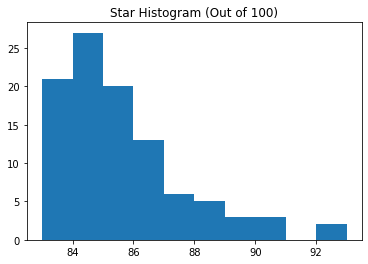

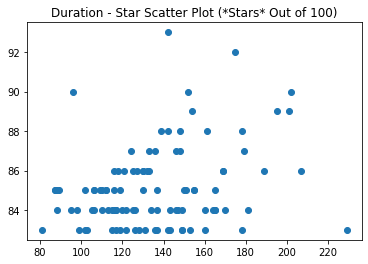

In [167]:
import matplotlib.pyplot as plt
import numpy as np

# Star Histogram (Out of 100)
stars_hist = [int(float(i)*10) for i in df["Star"].tolist()]
plt.hist(stars_hist)
plt.title("Star Histogram (Out of 100)")
plt.show()

# Duration - Star Scatter Plot (*Stars* Out of 100)
# Is there a connection between the star and the duration?
durations_scatter = [int(i) for i in df["Duration(min)"].tolist()]
stars_scatter = [int(float(i)*10) for i in df["Star"].tolist()]
plt.scatter(durations_scatter, stars_scatter)
plt.title("Duration - Star Scatter Plot (*Stars* Out of 100)")
plt.show()
#It doesn't seem like there is.

